In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [242]:
url = 'https://drive.google.com/file/d/1GRRfOnM0cwB9cRlyUVZHw0com64VFz9o/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='iso-8859-1', on_bad_lines='skip')

In [243]:
df.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Category,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,NaN,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,NaN,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,NaN,LANC RML CR NUIT J75ML SUB,1.0,30.8
3,SEP,SEPHORA CANADA,229842,SEPHORA #522 PTE-CLAIRE,H9R 1C4,2022,142022,3360374000110,NaN,VR FLBB BODY MILK 200ML SUB,1.0,73.0
4,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3360374000110,NaN,VR FLBB BODY MILK 200ML SUB,1.0,73.0


In [244]:
df.shape

(302019, 12)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302019 entries, 0 to 302018
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Retailer Code    302019 non-null  object 
 1   Retailer Name    293381 non-null  object 
 2   Door Code        302019 non-null  int64  
 3   Door Name        302019 non-null  object 
 4   Door Zip Code    302019 non-null  object 
 5   Year             302019 non-null  int64  
 6   Week             302019 non-null  int64  
 7   UPC              302019 non-null  int64  
 8   SKU Category     0 non-null       float64
 9   SKU Descreption  302019 non-null  object 
 10  POS Units        302019 non-null  float64
 11  POS Amount       301140 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 27.7+ MB


In [104]:
df.isna().sum()

Retailer Code           0
Retailer Name        8638
Door Code               0
Door Name               0
Door Zip Code           0
Year                    0
Week                    0
UPC                     0
SKU Category       302019
SKU Descreption         0
POS Units               0
POS Amount            879
dtype: int64

In [105]:
df.drop(['SKU Category'], axis=1, inplace=True)

In [106]:
inds = pd.isna(df['Retailer Name'])

In [107]:
indexes = [i for i,n in enumerate(list(inds)) if n==True]

In [108]:
df_with_empty_values = df.iloc[indexes]

In [109]:
df_with_empty_values

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
11057,ECOM,NaN,600101,CLIENT INTERNET MAINE,UKN,2022,172022,3614273721189,BIOTH BTH AQS HYALU PROMO VALUE SET,1.0,33.28
11058,ECOM,NaN,600102,CLIENT INTERNET NEW HAMPSHIRE,UKN,2022,152022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,1.0,30.91
11059,ECOM,NaN,600104,CLIENT INTERNET MASSACHUSETTS,UKN,2022,152022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,2.0,64.19
11060,ECOM,NaN,600104,CLIENT INTERNET MASSACHUSETTS,UKN,2022,152022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,2.0,64.19
11061,ECOM,NaN,600104,CLIENT INTERNET MASSACHUSETTS,UKN,2022,162022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,2.0,64.19
...,...,...,...,...,...,...,...,...,...,...,...
299673,ECOM,NaN,600149,CLIENT INTERNET CALIFORNIA,UKN,2022,162022,4935421773515,SHU CO ULTIME8 2021 NEWPKG FS B50,1.0,13.14
299674,ECOM,NaN,600141,CLIENT INTERNET COLORADO,UKN,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,1.0,82.16
299675,ECOM,NaN,600147,CLIENT INTERNET WASHINGTON,UKN,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,1.0,82.15
299676,ECOM,NaN,600149,CLIENT INTERNET CALIFORNIA,UKN,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,4.0,328.61


In [110]:
df_with_empty_values['Retailer Code'].value_counts()

ECOM    8638
Name: Retailer Code, dtype: int64

In [111]:
df.loc[indexes, 'Retailer Name'] = 'ECOM'

In [112]:
df['Retailer Code'].value_counts()

SDM     139218
SEP      72830
BAY      32628
BOU      18482
PJC      16844
ECOM      8638
LON       6846
NST       2618
HRF       2351
UNI       1443
AMA        120
PHP          1
Name: Retailer Code, dtype: int64

In [113]:
df['Retailer Name'].value_counts()

SDM (HEAD OFFICE)          139218
SEPHORA CANADA              72830
LA BAIE                     32628
BOUTIQUES KIEHL'S           18482
JEAN-COUTU                  16844
ECOM                         8638
LONDON DRUGS                 6846
NORDSTROM CANADA RETAIL      2618
HOLT RENFREW                 2351
UNIPRIX BUREAU CHEF          1443
AMAZON                        120
KATZ PHARMACY SERVICES          1
Name: Retailer Name, dtype: int64

In [114]:
df.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,30.8
3,SEP,SEPHORA CANADA,229842,SEPHORA #522 PTE-CLAIRE,H9R 1C4,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0
4,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0


In [115]:
pos_units = df['POS Units'].value_counts()

In [116]:
pos_units[:5]

 1.0    221672
 2.0     40340
 3.0     12232
-1.0     10672
 4.0      5473
 5.0      2838
Name: POS Units, dtype: int64

<BarContainer object of 281 artists>

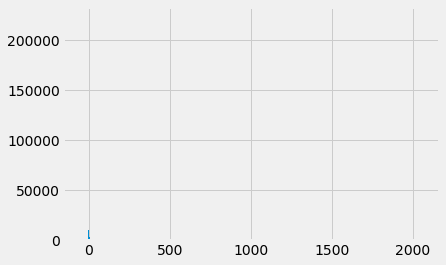

In [117]:
plt.bar(pos_units.keys(), pos_units.values)

In [118]:
df['Week'].value_counts()

152022    81715
162022    75397
172022    71001
142022    67137
182022     6769
Name: Week, dtype: int64

In [119]:
### Building 

### Removing the unrequired features

In [120]:
df.drop(['Retailer Code', 'Door Code', 'Door Name', 'Year', 'Week', 'SKU Descreption', 'POS Amount'], axis=1, inplace=True)

In [121]:
df.head()

,Retailer Name,Door Zip Code,UPC,POS Units
0,SEPHORA CANADA,R3P 2N3,8435137727100,1.0
1,SEPHORA CANADA,K4A 5E6,8435137727100,1.0
2,SEPHORA CANADA,K1N 9J7,3605970326494,1.0
3,SEPHORA CANADA,H9R 1C4,3360374000110,1.0
4,SEPHORA CANADA,J4Y 0L1,3360374000110,1.0


In [122]:
df['Door Zip Code'].value_counts()

UKN        8638
L6T 5A3    4901
M5B 2H1    3557
M9C 1B8    3551
M6A 2T9    3463
           ... 
N0P 2C0       1
L3R 6E4       1
J7A 4Z5       1
H7L 1L5       1
G1L 3R4       1
Name: Door Zip Code, Length: 1864, dtype: int64

In [123]:
retailers = df['Retailer Name'].value_counts()

In [160]:
retailers

SDM (HEAD OFFICE)          139218
SEPHORA CANADA              72830
LA BAIE                     32628
BOUTIQUES KIEHL'S           18482
JEAN-COUTU                  16844
ECOM                         8638
LONDON DRUGS                 6846
NORDSTROM CANADA RETAIL      2618
HOLT RENFREW                 2351
UNIPRIX BUREAU CHEF          1443
AMAZON                        120
KATZ PHARMACY SERVICES          1
Name: Retailer Name, dtype: int64

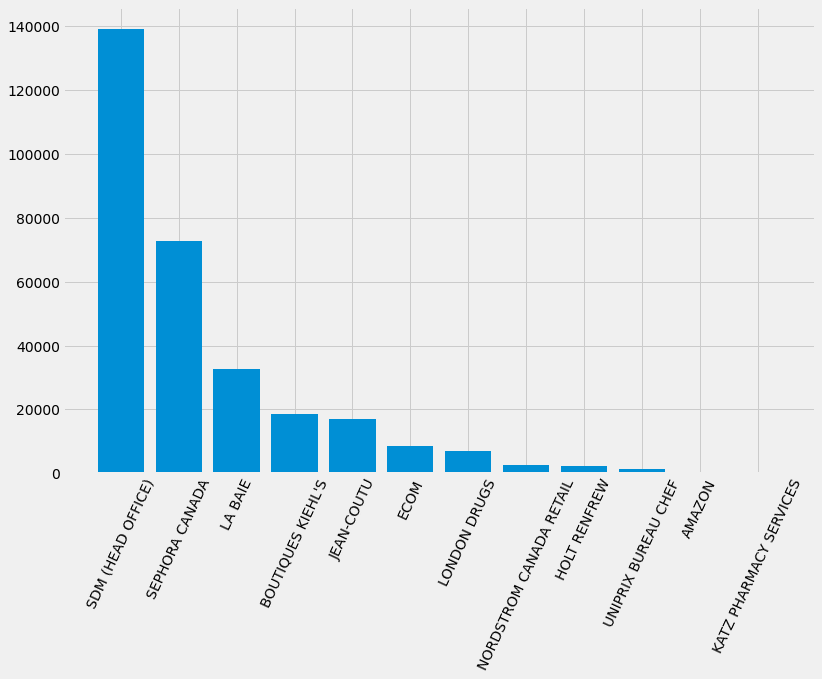

In [124]:
plt.figure(figsize = (12,8))
plt.bar(retailers.keys(), retailers.values)
plt.xticks(rotation=65);

In [125]:
df.head()

,Retailer Name,Door Zip Code,UPC,POS Units
0,SEPHORA CANADA,R3P 2N3,8435137727100,1.0
1,SEPHORA CANADA,K4A 5E6,8435137727100,1.0
2,SEPHORA CANADA,K1N 9J7,3605970326494,1.0
3,SEPHORA CANADA,H9R 1C4,3360374000110,1.0
4,SEPHORA CANADA,J4Y 0L1,3360374000110,1.0


### Simplyfing the dataset

In [126]:
### Given the below dataframe, how much units have been given to each retailer vs how much have been received back

### Percentage of returns

In [127]:
df_returns = df.loc[df['POS Units'] <0]

In [128]:
df_returns

,Retailer Name,Door Zip Code,UPC,POS Units
5,SEPHORA CANADA,J4Y 0L1,3605971639944,-1.0
6,SEPHORA CANADA,H1M 1W9,3605972496751,-1.0
16,SEPHORA CANADA,H3B 5K4,3700194718541,-1.0
43,SEPHORA CANADA,L4L 9K5,3605972134004,-1.0
44,SEPHORA CANADA,L4L 9K5,817919019593,-1.0
...,...,...,...,...
301982,SEPHORA CANADA,M5B 2H1,4935421773515,-1.0
301991,SEPHORA CANADA,M9C 1B8,4935421773515,-1.0
301996,SEPHORA CANADA,V3Z 0C8,3605972659729,-1.0
302002,SEPHORA CANADA,L6T 3R5,3614272404786,-1.0


=> Some basic statistics that can be extracted are, Out of 302019 products allocation, 11205 times, the products are returned

In [129]:
return_percentage = (df_returns.shape[0]/df.shape[0])*100

In [130]:
return_percentage

3.710031488085187

### Lets find out which retailers have the highest return of products

In [131]:
df_returns.head()

,Retailer Name,Door Zip Code,UPC,POS Units
5,SEPHORA CANADA,J4Y 0L1,3605971639944,-1.0
6,SEPHORA CANADA,H1M 1W9,3605972496751,-1.0
16,SEPHORA CANADA,H3B 5K4,3700194718541,-1.0
43,SEPHORA CANADA,L4L 9K5,3605972134004,-1.0
44,SEPHORA CANADA,L4L 9K5,817919019593,-1.0


### No of times return happened for each retailer

In [134]:
number_of_returns_for_retailers = df_returns.groupby(['Retailer Name']).count()['POS Units']

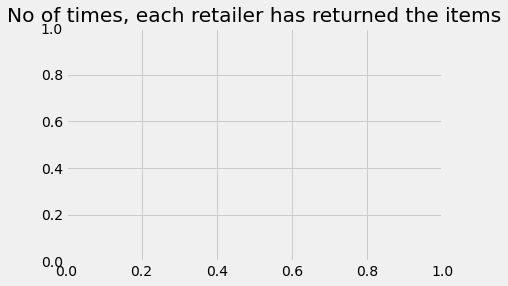

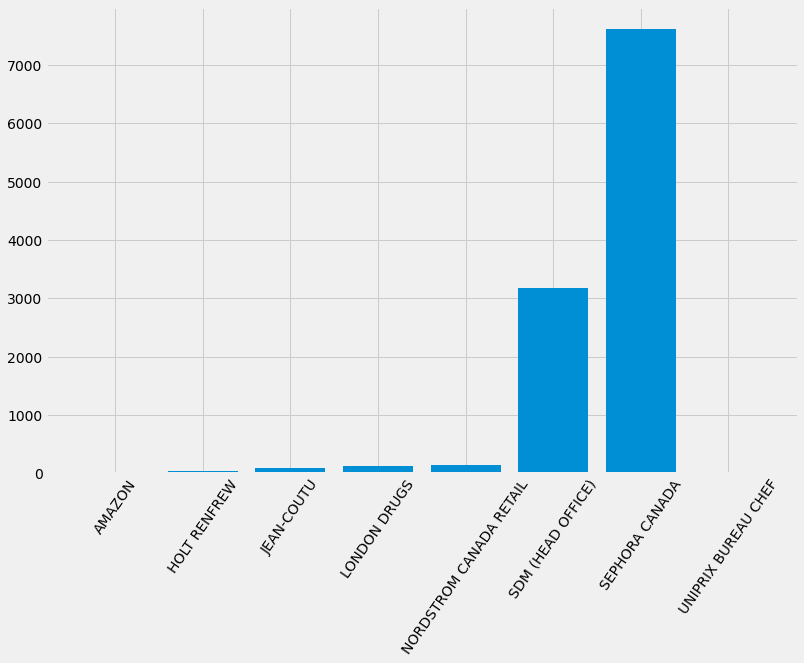

In [136]:
plt.title('No of times, each retailer has returned the items')
plt.figure(figsize=(12,8))
plt.xticks(rotation=55)
plt.bar(number_of_returns_for_retailers.keys(), number_of_returns_for_retailers.values);

In [137]:
number_of_returns_for_retailers

Retailer Name
AMAZON                        1
HOLT RENFREW                 35
JEAN-COUTU                   94
LONDON DRUGS                127
NORDSTROM CANADA RETAIL     145
SDM (HEAD OFFICE)          3184
SEPHORA CANADA             7618
UNIPRIX BUREAU CHEF           1
Name: POS Units, dtype: int64

### Total number of items that were returned for each retailer

In [144]:
count_of_returns_for_retailers = df_returns.groupby(['Retailer Name'])['POS Units'].sum()

In [145]:
count_of_returns_for_retailers

Retailer Name
AMAZON                       -1.0
HOLT RENFREW                -38.0
JEAN-COUTU                  -95.0
LONDON DRUGS               -129.0
NORDSTROM CANADA RETAIL    -164.0
SDM (HEAD OFFICE)         -3314.0
SEPHORA CANADA            -8134.0
UNIPRIX BUREAU CHEF          -1.0
Name: POS Units, dtype: float64

In [146]:
total_items_returned_by_each_retailer = [np.abs(x) for x in count_of_returns_for_retailers.values]

In [147]:
total_items_returned_by_each_retailer

[1.0, 38.0, 95.0, 129.0, 164.0, 3314.0, 8134.0, 1.0]

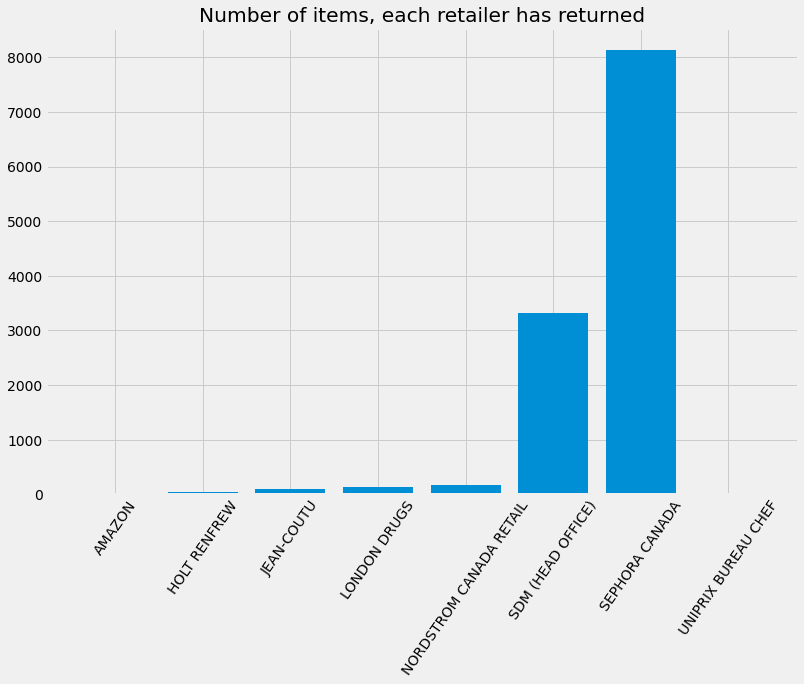

In [148]:
plt.figure(figsize=(12,8))
plt.title('Number of items, each retailer has returned')
plt.xticks(rotation=55)
plt.bar(count_of_returns_for_retailers.keys(), total_items_returned_by_each_retailer);

In [149]:
count_of_returns_for_retailers

Retailer Name
AMAZON                       -1.0
HOLT RENFREW                -38.0
JEAN-COUTU                  -95.0
LONDON DRUGS               -129.0
NORDSTROM CANADA RETAIL    -164.0
SDM (HEAD OFFICE)         -3314.0
SEPHORA CANADA            -8134.0
UNIPRIX BUREAU CHEF          -1.0
Name: POS Units, dtype: float64

In [150]:
df_returns.head()

,Retailer Name,Door Zip Code,UPC,POS Units
5,SEPHORA CANADA,J4Y 0L1,3605971639944,-1.0
6,SEPHORA CANADA,H1M 1W9,3605972496751,-1.0
16,SEPHORA CANADA,H3B 5K4,3700194718541,-1.0
43,SEPHORA CANADA,L4L 9K5,3605972134004,-1.0
44,SEPHORA CANADA,L4L 9K5,817919019593,-1.0


In [170]:
items_delivered_to_retailers = df[df['POS Units']>0].groupby(['Retailer Name'])['POS Units'].sum()

In [171]:
items_returned_from_retailers = df_returns.groupby(['Retailer Name'])['POS Units'].sum()

### Since not every retailer has returned the items, we will look at those who did returns

In [185]:
retailers_that_returned_items = list(set(items_delivered_to_retailers.keys()).intersection(items_returned_from_retailers.keys()))
retailers_that_never_returned_items = list(set(items_delivered_to_retailers.keys()).difference(items_returned_from_retailers.keys()))

### Retailers who did returns

In [200]:
retailers_that_returned_items

['HOLT RENFREW',
 'LONDON DRUGS',
 'JEAN-COUTU',
 'SDM (HEAD OFFICE)',
 'NORDSTROM CANADA RETAIL',
 'UNIPRIX BUREAU CHEF',
 'SEPHORA CANADA',
 'AMAZON']

In [205]:
retailers_with_items_delivered = df[(df['POS Units'] > 0) & (df['Retailer Name'].isin(retailers_that_returned_items))].groupby(['Retailer Name'])['POS Units'].count()

In [206]:
retailers_with_items_returned = df[(df['POS Units'] < 0) & (df['Retailer Name'].isin(retailers_that_returned_items))].groupby(['Retailer Name'])['POS Units'].count()

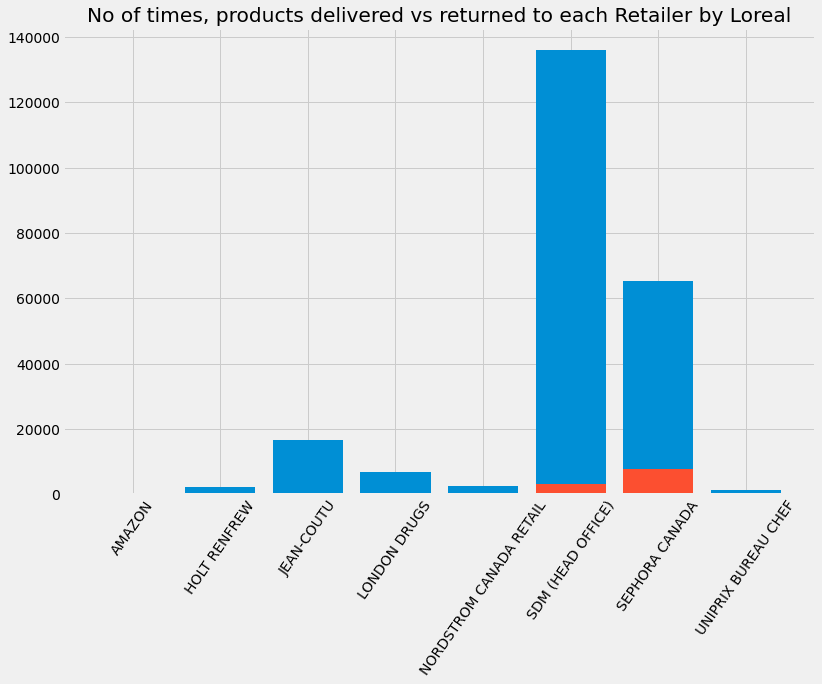

In [211]:
plt.figure(figsize=(12,8))
plt.title('No of times, products delivered vs returned to each Retailer by Loreal')
plt.xticks(rotation=55)
plt.bar(retailers_with_items_delivered.keys(), retailers_with_items_delivered.values);
plt.bar(retailers_with_items_returned.keys(), retailers_with_items_returned.values);

In [212]:
retailers_with_items_delivered

Retailer Name
AMAZON                        119
HOLT RENFREW                 2316
JEAN-COUTU                  16750
LONDON DRUGS                 6719
NORDSTROM CANADA RETAIL      2473
SDM (HEAD OFFICE)          136034
SEPHORA CANADA              65212
UNIPRIX BUREAU CHEF          1442
Name: POS Units, dtype: int64

In [213]:
retailers_with_items_returned

Retailer Name
AMAZON                        1
HOLT RENFREW                 35
JEAN-COUTU                   94
LONDON DRUGS                127
NORDSTROM CANADA RETAIL     145
SDM (HEAD OFFICE)          3184
SEPHORA CANADA             7618
UNIPRIX BUREAU CHEF           1
Name: POS Units, dtype: int64

### Retailers that have never returned any products (Best to remove these retailers while developing the model)

In [189]:
retailers_that_never_returned_items

['KATZ PHARMACY SERVICES', 'ECOM', "BOUTIQUES KIEHL'S", 'LA BAIE']

In [56]:
### Stacked Bar Chart that shows the no. of times products received vs no. of times products returned (2 colors in 1 bar)

In [64]:
df.head(3)

,Retailer Name,Door Zip Code,UPC,POS Units
0,SEPHORA CANADA,R3P 2N3,8435137727100,1.0
1,SEPHORA CANADA,K4A 5E6,8435137727100,1.0
2,SEPHORA CANADA,K1N 9J7,3605970326494,1.0


In [62]:
#products returned vs received by each retailer
retailers = df['Retailer Name'].unique()
retailers

array(['SEPHORA CANADA', 'LONDON DRUGS', 'NORDSTROM CANADA RETAIL',
       'LA BAIE', 'HOLT RENFREW', 'JEAN-COUTU', 'SDM (HEAD OFFICE)',
       'AMAZON', "BOUTIQUES KIEHL'S", 'ECOM', 'UNIPRIX BUREAU CHEF',
       'KATZ PHARMACY SERVICES'], dtype=object)

In [61]:
df.

array(['SEPHORA CANADA', 'LONDON DRUGS', 'NORDSTROM CANADA RETAIL',
       'LA BAIE', 'HOLT RENFREW', 'JEAN-COUTU', 'SDM (HEAD OFFICE)',
       'AMAZON', "BOUTIQUES KIEHL'S", 'ECOM', 'UNIPRIX BUREAU CHEF',
       'KATZ PHARMACY SERVICES'], dtype=object)

In [57]:
### Stacked Bar Chart that shows the count products received vs no. of times products returned (2 colors in 1 bar)

In [58]:
### Which particular products are returned the most by retailer

In [ ]:
### Which particular products are returned the most by each store in retailer

### Lets find out which stores for each retailers have the highest return of products

### finding any anomalies